# Alexander Fabiano
# HW 5

## Topic: Dimensionality Reduction and Clustering

For this homework we will be using some image data! Specifically, the MNIST data set. You can load this data easily with the following commands:

In [1]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

### Assignment Description

The MNIST data set is hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Source: https://www.kaggle.com/c/digit-recognizer/data

For this homework, perform the following with the MNIST data:

1. Use PCA to reduce the dimensionality

    a. How many components did you use? Why?
    
    b. Plot the first two components. Do you notice any trends? What is this plot showing us?
    
    c. Why would you use PCA? What is it doing? And what are the drawbacks?
    
    d. Plot some of the images, then compress them using PCA and plot again. How does it look?
    
2. Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

    a. How does this plot differ from your PCA plot?
    
    b. How robust is it to changes in perplexity?
    
    c. How robust is it to different learning rate and number of iterations?
    
3. Perform k-means clustering:

    a. How did you choose k?
    
    b. How did you evaluate your clustering?
    
    c. Visualize your clusters using t-sne
    
    d. Did you scale your data?
    
    e. How robust is your clustering?
    
4. Perform hierarchical clustering:

    a. Plot your dendrogram
    
    b. How many clusters seem reasonable based off your graph?
    
    c. How does your dendrogram change with different linkage methods?

### Grading

This homework is due **March 22, 2018 by midnight Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Storytelling - 10%
* PCA - 20%
* T-SNE - 20%
* K-means - 20%
* Hierarchical Clustering - 20%

**Import Statements**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.utils import shuffle

## 1. Principle Component Analysis 

Insert description of PCA here:

In [3]:
pca = PCA()
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(70000, 784)


In [4]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(70000, 154)


### a. How many components did you use? Why?

I chose to use 154 components. While this number may seem arbitrary, I want my model to explain at least 95% of the variance in the data, so I found the minimum number of components whose cumulative sum is greater than or equal to 0.95.

Text(0.5,1,'Cumulative Sum of Explained Variance')

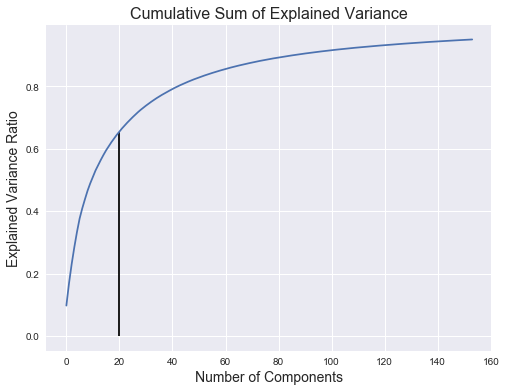

In [5]:
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[20],x=20)
plt.xlabel("Number of Components", fontsize=14)
plt.ylabel("Explained Variance Ratio", fontsize=14)
plt.title("Cumulative Sum of Explained Variance", fontsize=16)

In [6]:
index_75 = np.argmax(cum_ratio >= 0.75)
print(index_75)
print(cum_ratio[index_75])

32
0.750656642913


### b. Plot the first two components. Do you notice any trends? What is this plot showing us?

Text(0.5,1,'PCA 1 & 2')

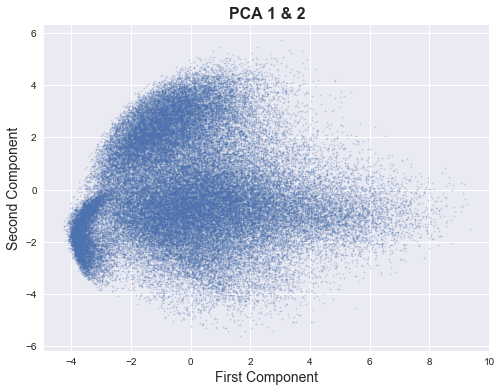

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1], alpha=.25, marker='h', s=2)
plt.xlabel("First Component", fontsize=14)
plt.ylabel("Second Component", fontsize=14)
plt.title("PCA 1 & 2", fontsize=16, fontweight='bold')

answer question above...

### c. Why would you use PCA? What is it doing? And what are the drawbacks?

Principle component analysis is used to reduce high dimension data. PCA calculates the orthogonal eigenvectors from the matrix AA', which are derived from the singular value decomposition of a matrix A. In other words, PCA takes high dimension data and projects it down to lower dimensions while maximizing the variance of the data for each component. While this effectively reduces the dimensions of the data, PCA loses some information with each iteration. An illustration of this information loss as a result of PCA can be observed in the following section (d).

### d. Plot some of the images, then compress them using PCA and plot again. How does it look?

The original images, although reminscient of pixelated Atari graphics, are relatively defined given the pixel density. However upon examing the reconstructed PCA images, one can see that these are much more blurry and the coloring is far less defined than their original counterparts. Areas of crisp blackness in the original numbers become blurred into adjacent grey and white pixels in the reconstructed images. This is a result of the information loss from PCA dimensionality reduction.

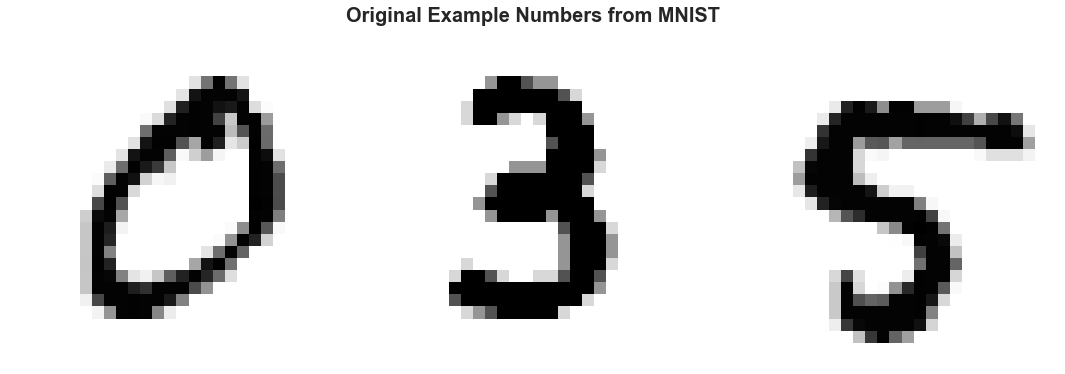

In [8]:
plt.figure(figsize=(15,5))
plt.suptitle("Original Example Numbers from MNIST", fontsize=20, y=1.03, fontweight='bold')
plt.subplot(1,3,1)
plt.imshow(X[0].reshape((28,28)), cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,2)
plt.imshow(X[64000].reshape((28,28)), cmap='Greys') 
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,3)
plt.imshow(X[33000].reshape((28,28)), cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.tight_layout()

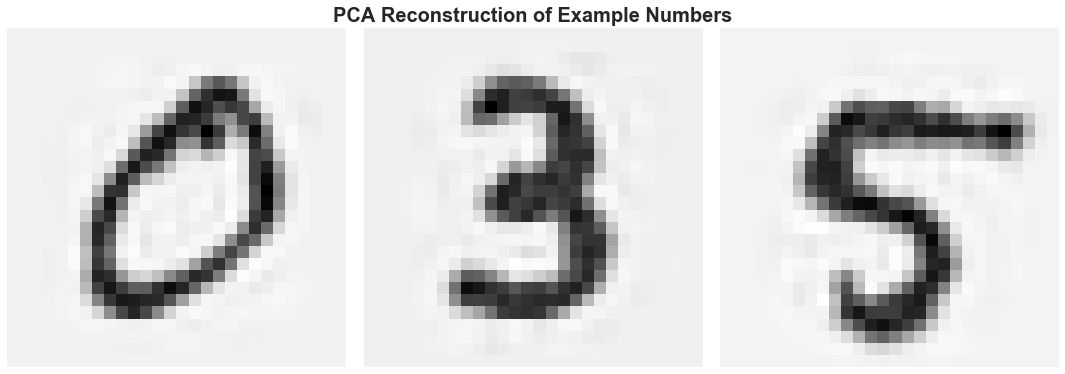

In [9]:
plt.figure(figsize=(15,5))
plt.suptitle("PCA Reconstruction of Example Numbers", fontsize=20, y=1.03, fontweight='bold')
plt.subplot(1,3,1)
plt.imshow(pca.inverse_transform(X_pca[0]).reshape((28,28)), cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,2)
plt.imshow(pca.inverse_transform(X_pca[64000]).reshape((28,28)), cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,3)
plt.imshow(pca.inverse_transform(X_pca[33000]).reshape((28,28)), cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.tight_layout()

## 2. T-Distributed Stochastic Neighbor Embedding (T-SNE)

In [11]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

In [12]:
def create_tsne(perplexity, n_iter, learning_rate):
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=n_iter, learning_rate=learning_rate)
    return tsne.fit_transform(X_pca[rows[:n_select],:]) 

In [82]:
df_tsne = pd.DataFrame(create_tsne(50,1000,200), columns=['Component_1', 'Component_2'])
df_tsne['label'] = y[rows[:n_select]]

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.057s...
[t-SNE] Computed neighbors for 10000 samples in 28.899s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.147995
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.455910
[t-SNE] Error after 1000 iterations: 1.714345


Text(0.5,1,'First & Second Components with T-SNE')

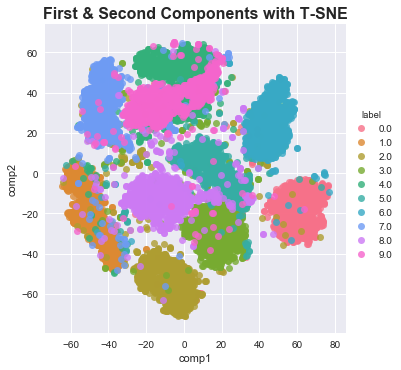

In [83]:
plt.figure(figsize=(8,6))
sns.lmplot(x='Component_1', y='Component_2', data=df_tsne, hue='label', fit_reg=False)
plt.title("T-SNE Components 1 & 2\n$\it{original}$ $\it{perplexity(50)}$", fontsize=16, fontweight='bold')

### a. How does this plot differ from your PCA plot?

The PCA plot merely shows the first component against the second component; since orthogonality is the only relationship between the first two components, the PCA plot does not reveal any trends. On the other hand, T-SNE preserves the original relationships among the data using conditional probabilities as it projects the data into lower dimensions. Thus, we are able to see patterns in the data. From the illustration above, one can observe that T-SNE identifies the 10 numeric classes in the MNIST dataset.

### b. How robust is T-SNE to changes in perplexity?

In [13]:
df_tsne2 = pd.DataFrame(create_tsne(75,1000,200), columns=['Component 1', 'Component 2'])
df_tsne2['label'] = y[rows[:n_select]]

[t-SNE] Computing 226 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.055s...
[t-SNE] Computed neighbors for 10000 samples in 30.211s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.290055
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.021172
[t-SNE] Error after 1000 iterations: 1.625205


In [17]:
df_tsne3 = pd.DataFrame(create_tsne(25,1000,200), columns=['Component 1', 'Component 2'])
df_tsne3['label'] = y[rows[:n_select]]

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.054s...
[t-SNE] Computed neighbors for 10000 samples in 27.988s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.901178
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.121094
[t-SNE] Error after 1000 iterations: 1.844665


Text(0.5,1,'T-SNE Components 1 & 2\n$\\it{perplexity}$ $\\it{increase(75)}$')

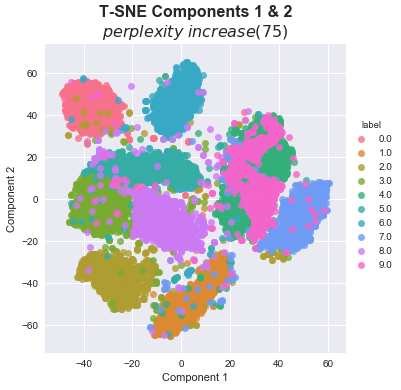

In [29]:
sns.lmplot(x='Component 1', y='Component 2', data=df_tsne2, hue='label', fit_reg=False)
plt.title("T-SNE Components 1 & 2\n$\it{perplexity}$ $\it{increase(75)}$", fontsize=16, fontweight='bold')

Text(0.5,1,'T-SNE Components 1 & 2\n$\\it{perplexity}$ $\\it{decrease(25)}$')

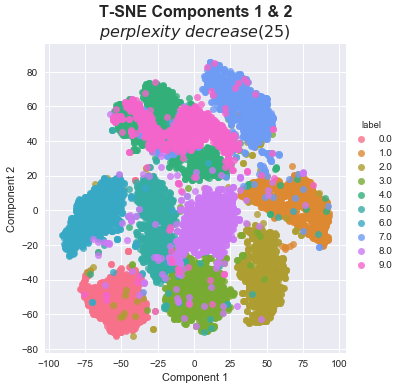

In [27]:
sns.lmplot(x='Component 1', y='Component 2', data=df_tsne3, hue='label', fit_reg=False)
plt.title("T-SNE Components 1 & 2\n$\it{perplexity}$ $\it{decrease(25)}$", fontsize=16, fontweight='bold')

### c. How robust is T-SNE to different learning rate and number of iterations?

In [30]:
df_tsne4 = pd.DataFrame(create_tsne(50,1500,200), columns=['Component 1', 'Component 2'])
df_tsne4['label'] = y[rows[:n_select]]

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.054s...
[t-SNE] Computed neighbors for 10000 samples in 29.414s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.144523
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.033646
[t-SNE] Error after 1500 iterations: 1.691210


In [31]:
df_tsne5 = pd.DataFrame(create_tsne(50,500,200), columns=['Component 1', 'Component 2'])
df_tsne5['label'] = y[rows[:n_select]]

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.037s...
[t-SNE] Computed neighbors for 10000 samples in 27.856s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.144523
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.936623
[t-SNE] Error after 500 iterations: 1.909288


In [32]:
df_tsne6 = pd.DataFrame(create_tsne(50,1000,300), columns=['Component 1', 'Component 2'])
df_tsne6['label'] = y[rows[:n_select]]

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.048s...
[t-SNE] Computed neighbors for 10000 samples in 29.220s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.144523
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.034554
[t-SNE] Error after 1000 iterations: 1.708897


In [33]:
df_tsne7 = pd.DataFrame(create_tsne(50,1000,100), columns=['Component 1', 'Component 2'])
df_tsne7['label'] = y[rows[:n_select]]

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.053s...
[t-SNE] Computed neighbors for 10000 samples in 28.860s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.144523
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.045677
[t-SNE] Error after 1000 iterations: 1.747506


## 3. K-Means Clustering

### a. How did you choose k?

In [36]:
ks = []
for k in range(1,16):
    kmeans = KMeans(n_clusters=k, n_init=50, n_jobs=-1)
    kmeans.fit(df_tsne)
    sses.append(kmeans.inertia_)
plt.plot(range(1,16), ks)

Process ForkPoolWorker-23:
Process ForkPoolWorker-22:
Process ForkPoolWorker-24:
Process ForkPoolWorker-21:


KeyboardInterrupt: 

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=50, n_jobs=-1)
kmeans.fit(df[['Frozen', 'Fresh']])
sk_clusters = kmeans.predict(df[['Frozen', 'Fresh']])
plt.scatter(df['Frozen'], df['Fresh'], c=sk_clusters)
plt.xlabel("Frozen Spending")
plt.ylabel("Fresh Spending")
plt.xlim(0,120000)
plt.ylim(0,120000)
plt.plot(range(120000), range(120000))

### b. How did you evaluate your clustering?

### c. Visualize your clusters using T-SNE

### d. Did you scale your data?

### e. How robust is your clustering?

## 4. Hierarchical Clustering

### a. Plot the dendrogram

In [25]:
x_shuf = shuffle(X, random_state=0)
def create_dendrogram(linkage_method):
    Z = linkage(x_shuf[0:250], '{}'.format(linkage_method))
    _ = dendrogram(Z)
    return _

Text(0.5,1,'MNIST Dendrogram')

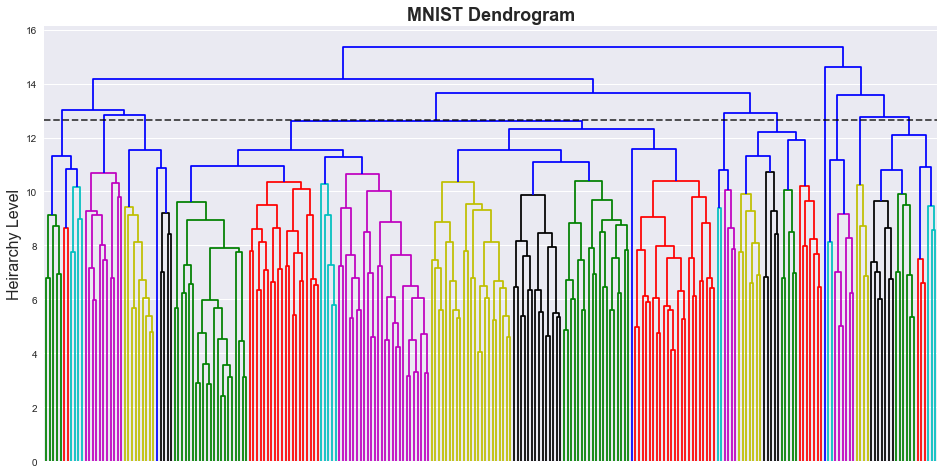

In [29]:
plt.figure(figsize=(16, 8))
create_dendrogram('complete')
plt.axhline(12.65, alpha=.75, c='k', linestyle='dashed')
plt.xticks([])
plt.ylabel("Heirarchy Level", fontsize=16)
plt.title("MNIST Dendrogram", fontsize=18, fontweight='bold')

### b. How many clusters seem reasonable based off your graph?

According to the above dendrogram, a reasonable amount of clusters would be somewhere between 6 and 11. This logically aligns with the MNIST dataset since there are 10 distinct classes, namely numbers 0-10.

### c. How does your dendrogram change with different linkage methods?

Text(0.5,1,'MNIST Dendrogram')

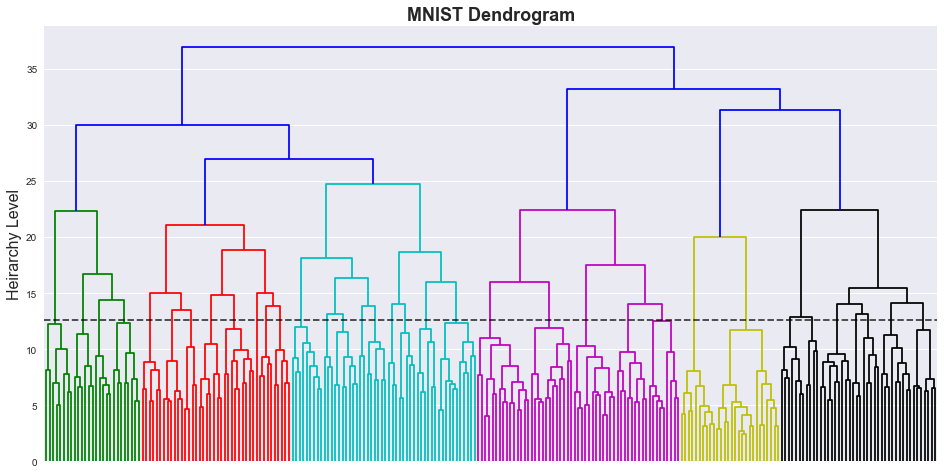

In [30]:
plt.figure(figsize=(16, 8))
create_dendrogram('ward')
plt.axhline(12.65, alpha=.75, c='k', linestyle='dashed')
plt.xticks([])
plt.ylabel("Heirarchy Level", fontsize=16)
plt.title("MNIST Dendrogram", fontsize=18, fontweight='bold')

Text(0.5,1,'MNIST Dendrogram')

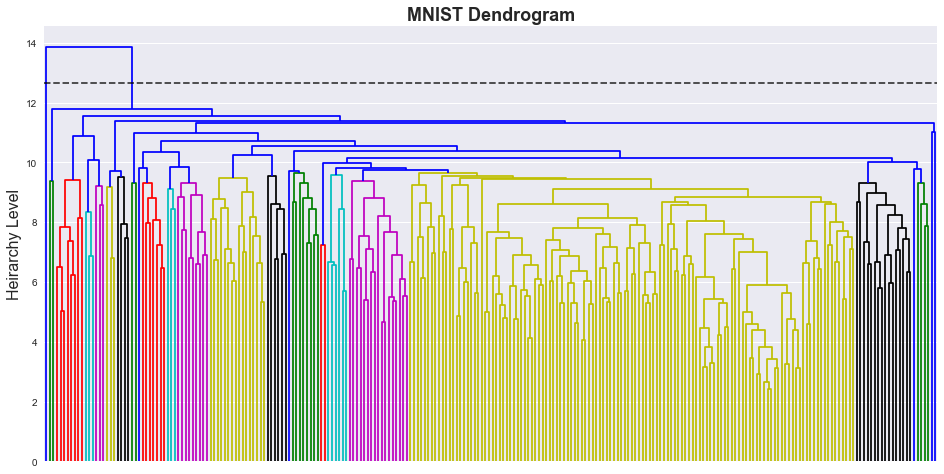

In [31]:
plt.figure(figsize=(16, 8))
create_dendrogram('average')
plt.axhline(12.65, alpha=.75, c='k', linestyle='dashed')
plt.xticks([])
plt.ylabel("Heirarchy Level", fontsize=16)
plt.title("MNIST Dendrogram", fontsize=18, fontweight='bold')